In [1]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('/content/Salary_Data.csv')

In [4]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [12]:
#verifying if there any any values
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
#checking for correlation
df.corr() 

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


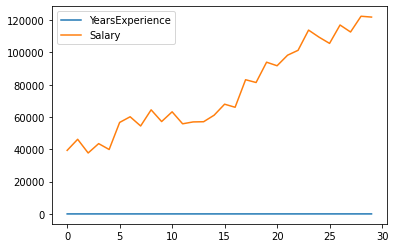

In [14]:
df.plot()

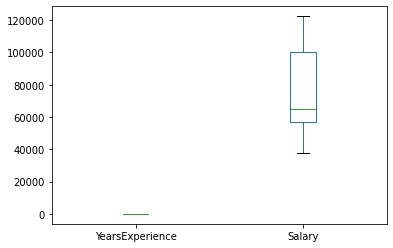

In [15]:
#checking for outliers
df.plot(kind='box')

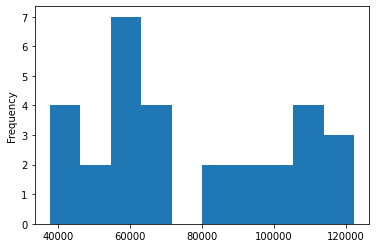

In [18]:
df['Salary'].plot(kind='hist')

Fitting a Linear Regression **Model** 



In [20]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = df).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [23]:
import seaborn as sns 

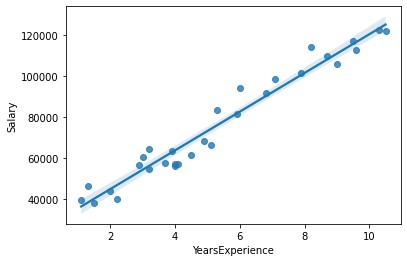

In [25]:
sns.regplot(x='YearsExperience',y='Salary',data=df)

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           1.14e-20
Time:                        09:15:32   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

Predict for new data points

In [31]:
newdata = pd.Series([1,5,10,20,30,40])
data_pred = pd.DataFrame(newdata,columns=['YearsExperience'])

In [32]:
model.predict(data_pred)

0     35242.162520
1     73042.011806
2    120291.823413
3    214791.446628
4    309291.069842
5    403790.693057
dtype: float64